# **Import Library**

In [ ]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

## **Data Preparation**

In [ ]:
# Load the data into a DataFrame
file_path = Path("data.csv")
data = pd.read_csv(file_path)
data.head()


,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [ ]:
#Remove songs created before 1960
year_limit=1960
data_1960_df = data[data['year']>year_limit]
data_1960_df.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,118900.000000,118900.000000,118900.000000,118900.000000,1.189000e+05,118900.000000,118900.000000,118900.000000,118900.000000,118900.000000,118900.000000,118900.000000,118900.000000,118900.000000,118900.000000
mean,0.538535,1990.490320,0.351550,0.554089,2.386142e+05,0.573050,0.100168,0.110133,5.214449,0.201429,-9.940915,0.707881,42.517502,0.075705,119.842238
std,0.260172,17.291647,0.326737,0.174301,1.116213e+05,0.248501,0.300225,0.258921,3.534181,0.178627,5.075899,0.454739,15.320393,0.090851,30.023464
min,0.000000,1961.000000,0.000000,0.000000,1.470800e+04,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.331000,1976.000000,0.042700,0.437000,1.809600e+05,0.392000,0.000000,0.000000,2.000000,0.093800,-12.557000,0.000000,31.000000,0.033500,96.555000
50%,0.546000,1990.000000,0.250000,0.563000,2.223200e+05,0.590000,0.000000,0.000062,5.000000,0.129000,-9.010000,1.000000,42.000000,0.043100,117.855500
75%,0.756000,2005.000000,0.640000,0.680000,2.716670e+05,0.777000,0.000000,0.014500,8.000000,0.254000,-6.260000,1.000000,53.000000,0.070600,138.513250
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.744000,1.000000,100.000000,0.964000,243.507000


In [ ]:
#Show avaliable columns
data_1960_df.columns

Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo'],
      dtype='object')

In [ ]:
#Use only essential columns
cleanData = data_1960_df[['valence', 'year', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 
       'speechiness', 'tempo', 'popularity']]

In [ ]:
#Dataframe Metrics
cleanData.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,popularity
count,118900.000000,118900.000000,118900.000000,118900.000000,1.189000e+05,118900.000000,118900.000000,118900.000000,118900.000000,118900.000000,118900.000000,118900.000000,118900.000000,118900.000000,118900.000000
mean,0.538535,1990.490320,0.351550,0.554089,2.386142e+05,0.573050,0.100168,0.110133,5.214449,0.201429,-9.940915,0.707881,0.075705,119.842238,42.517502
std,0.260172,17.291647,0.326737,0.174301,1.116213e+05,0.248501,0.300225,0.258921,3.534181,0.178627,5.075899,0.454739,0.090851,30.023464,15.320393
min,0.000000,1961.000000,0.000000,0.000000,1.470800e+04,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.331000,1976.000000,0.042700,0.437000,1.809600e+05,0.392000,0.000000,0.000000,2.000000,0.093800,-12.557000,0.000000,0.033500,96.555000,31.000000
50%,0.546000,1990.000000,0.250000,0.563000,2.223200e+05,0.590000,0.000000,0.000062,5.000000,0.129000,-9.010000,1.000000,0.043100,117.855500,42.000000
75%,0.756000,2005.000000,0.640000,0.680000,2.716670e+05,0.777000,0.000000,0.014500,8.000000,0.254000,-6.260000,1.000000,0.070600,138.513250,53.000000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.744000,1.000000,0.964000,243.507000,100.000000


In [ ]:
#Dataframe head
cleanData.head()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,popularity
7806,0.343,1961,0.941,0.396,182360,0.293,0,0.000196,2,0.105,-14.062,1,0.0275,100.307,78
7807,0.598,1961,0.451,0.364,171600,0.607,0,0.000000,2,0.251,-9.791,1,0.1250,79.987,63
7808,0.356,1961,0.931,0.471,164573,0.021,0,0.000001,10,0.103,-24.385,1,0.0366,107.765,66
7809,0.967,1961,0.729,0.785,148040,0.776,0,0.000000,2,0.181,-5.259,1,0.0312,121.505,67
7810,0.800,1961,0.768,0.594,221704,0.889,0,0.000000,5,0.124,-7.775,1,0.2460,116.187,63


In [ ]:
#Dataframe tail
cleanData.tail()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,popularity
170648,0.608,2020,0.08460,0.786,301714,0.808,0,0.000289,7,0.0822,-3.702,1,0.0881,105.029,72
170649,0.734,2020,0.20600,0.717,150654,0.753,0,0.000000,7,0.1010,-6.020,1,0.0605,137.936,68
170650,0.637,2020,0.10100,0.634,211280,0.858,0,0.000009,4,0.2580,-2.226,0,0.0809,91.688,76
170651,0.195,2020,0.00998,0.671,337147,0.623,1,0.000008,2,0.6430,-7.161,1,0.3080,75.055,70
170652,0.642,2020,0.13200,0.856,189507,0.721,1,0.004710,7,0.1820,-4.928,1,0.1080,94.991,74


In [ ]:
#Split data into X and y
X = cleanData.iloc[:, 0:14].values
y = cleanData.iloc[:, 14].values


In [ ]:
#Scale X with Standard Scaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

## **Data Processing**

In [ ]:
#Initalize Nueral Networks
nn = Sequential()

# Hidden layer
nn.add(Dense(units=64, input_dim=14, activation="relu"))

# Second hidden layer
nn.add(Dense(units=32, activation="relu"))

# third hidden layer
nn.add(Dense(units=16, activation="relu"))

# fouth hidden layer
nn.add(Dense(units=8, activation="relu"))

# Output layer
nn.add(Dense(units=1, activation="linear"))


In [ ]:
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

In [ ]:
# Fit the model
model_1 = nn.fit(X, y, validation_split=0.3, epochs=10)

Epoch 1/10
2601/2601 [==============================] - 5s 2ms/step - loss: 362.8113 - mse: 362.8113 - val_loss: 202.3634 - val_mse: 202.3634
Epoch 2/10
2601/2601 [==============================] - 5s 2ms/step - loss: 114.6174 - mse: 114.6174 - val_loss: 174.6127 - val_mse: 174.6127
Epoch 3/10
2601/2601 [==============================] - 5s 2ms/step - loss: 112.3917 - mse: 112.3917 - val_loss: 215.7990 - val_mse: 215.7990
Epoch 4/10
2601/2601 [==============================] - 5s 2ms/step - loss: 110.3810 - mse: 110.3810 - val_loss: 181.4983 - val_mse: 181.4983
Epoch 5/10
2601/2601 [==============================] - 4s 2ms/step - loss: 109.0327 - mse: 109.0327 - val_loss: 170.0242 - val_mse: 170.0242
Epoch 6/10
2601/2601 [==============================] - 5s 2ms/step - loss: 107.1948 - mse: 107.1948 - val_loss: 153.3239 - val_mse: 153.3239
Epoch 7/10
2601/2601 [==============================] - 5s 2ms/step - loss: 106.1605 - mse: 106.1605 - val_loss: 183.3183 - val_mse: 183.3183
Epoch 

## **Data Analyze**

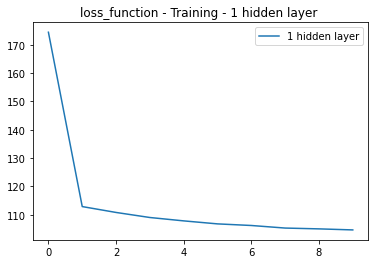

In [ ]:
# Plot the loss function of the training
plt.plot(model_1.history["loss"])
plt.title("loss_function - Training")
plt.show()

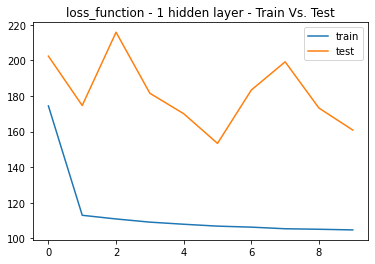

In [ ]:
# Plot train vs test 
plt.plot(model_1.history["loss"])
plt.plot(model_1.history["val_loss"])
plt.title("loss_function - Train Vs. Test")
plt.legend(["train", "test"])
plt.show()

In [ ]:
#Dataframe to compare actual vs predition
df = pd.DataFrame(y,columns=['actual'])

In [ ]:
df['predicted'] = nn.predict(X)

In [ ]:
df.tail()

,actual,predicted
118895,72,61.326263
118896,68,65.772156
118897,76,67.252808
118898,70,64.317543
118899,74,70.672508


In [ ]:
#Statistics on results
from scipy.stats import ttest_ind

ttest_ind(df['actual'], df['predicted'])


Ttest_indResult(statistic=-47.58512250813055, pvalue=0.0)

## **Export Model**

In [ ]:
nn_json = nn.to_json()

In [ ]:
filepath = 'model.json'
with open(filepath, 'w') as json_file:
  json_file.write(nn_json)

In [ ]:
filepath = 'model.h5'
nn.save_weights(filepath)

## **Import Model**

In [ ]:
from tensorflow.keras.models import model_from_json

In [ ]:
filepath = 'model.json'
with open(filepath, 'r') as json_file:
  model_json = json_file.read()

loaded_model = model_from_json(model_json)

In [ ]:
filepath = 'model.h5'
loaded_model.load_weights(filepath)

In [ ]:
X[[-1]]

array([[ 0.397679  ,  1.70659306, -0.67194789,  1.73213262, -0.43994672,
         0.59537516,  2.99719992, -0.40716413,  0.50522556, -0.10876735,
         0.98759566,  0.64239215,  0.35547567, -0.82773067]])

In [ ]:
y[-1]

74

In [ ]:
#Test prediction
loaded_model.predict(X[[-1]])


array([[70.67251]], dtype=float32)

In [ ]:
#Default
year=2020
energy=0.454
explicit=1
key=1
liveness=0.0824
mode=1
speechiness=0.375

## **Predict User Request**

In [ ]:
#Asking user
acousticness=0.0194
danceability=0.935
duration_ms=187541
instrumentalness=0
loudness=-7.5089
tempo=133.073
valence=0.357

In [ ]:
#Form input from user request
input = [[valence, year, acousticness, danceability,
       duration_ms, energy, explicit, instrumentalness, key,
       liveness, loudness, mode, 
       speechiness, tempo]]

In [ ]:
input

[[0.357,
  2020,
  0.0194,
  0.935,
  187541,
  0.454,
  1,
  0,
  1,
  0.0824,
  -7.5089,
  1,
  0.375,
  133.073]]

In [ ]:
X2 = cleanData.iloc[:, 0:14].values

In [ ]:
X2[[-1]] = input

In [ ]:
X2[[-1]]

array([[ 3.57000e-01,  2.02000e+03,  1.94000e-02,  9.35000e-01,
         1.87541e+05,  4.54000e-01,  1.00000e+00,  0.00000e+00,
         1.00000e+00,  8.24000e-02, -7.50890e+00,  1.00000e+00,
         3.75000e-01,  1.33073e+02]])

In [ ]:
#Scale input
scaler = StandardScaler().fit(X2)
X2 = scaler.transform(X2)

In [ ]:
X2[[-1]]

array([[-0.6977437 ,  1.70659306, -1.01656313,  2.18535297, -0.45755973,
        -0.47906449,  2.99719992, -0.42535491, -1.19246754, -0.66635184,
         0.47913769,  0.64239215,  3.29419585,  0.44067282]])

In [ ]:
#Run prediction
prediction = loaded_model.predict(X2[[-1]])

In [ ]:
#Prediction Result
prediction[0][0]

68.71162